# Predict students' dropout and academic success

Este estudo tem como propósito analisar um conjunto de dados elaborado como parte de um projeto voltado para diminuir o abandono e o fracasso acadêmico no ensino superior. Para atingir esse objetivo, serão aplicadas técnicas de aprendizado de máquina com o intuito de identificar estudantes em situação de risco em estágios iniciais de sua trajetória acadêmica, viabilizando a implementação de estratégias de suporte apropriadas.

O conjunto de dados inclui informações conhecidas no momento da matrícula do aluno – percurso acadêmico, dados demográficos e fatores socioeconômicos.

> O problema é formulado como uma tarefa de classificação de três categorias (abandono, matriculado e graduado) ao final do período normal do curso.

**Qual objetivo da análise:**

- Realizar análise exploratória dos dados. (EDA)
- Identificar Fatores Preditivos de Evasão Acadêmica e Reduzir Dimensionalidade dos Dados (Reduction Dimensionality)
- Desenvolver Modelos de Classificação de Evasão Sucesso (Machine Learning Algorithms)
- Comparar resultados e performance dos algoritmos (Performance Evaluation)

##  Análise Exploratória dos dados

In [243]:
#importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('max_columns', None)
plt.style.use('ggplot')

In [244]:
# importando  o arquivo
df = pd.read_csv("datapredict_StudentsDropoutSucess.csv",sep=  ";")

df1 = df.copy()
df2 = df.copy()
df3 = df.copy()

#### Quantidade e tipos de váriáveis

A base de dados possui 37 variáveis e 4424 registros, sem valores nulos.

In [245]:
len(df.columns)

37

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [247]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Marital status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Application order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Daytime/evening attendance\t,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous qualification,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Previous qualification (grade),4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Nacionality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mother's qualification,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Father's qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


In [248]:
df.head(2)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.0,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.0,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate


#### Distribuição dos dados

In [249]:
# Criando colunas categóricas
list_names_courses = {
    33:'Biofuel Production Technologies',
    171:'Animation and Multimedia Design',
    8014:'Social Service (evening attendance)',
    9003:'Agronomy',
    9070:'Communication Design',
    9085:'Veterinary Nursing',
    9119:'Informatics Engineering',
    9130:'Equinculture',
    9147:'Management',
    9238:'Social Service',
    9254:'Tourism',
    9500:'Nursing',
    9556:'Oral Hygiene',
    9670:'Advertising and Marketing Management',
    9773:'Journalism and Communication',
    9853:'Basic Education',
    9991:'Management (evening attendance)'
}


list_names_nacionality = {
    1:'Portuguese',
    2:'German',
    6:'Spanish',
    11:'Italian',
    13:'Dutch',
    14:'English',
    17:'Lithuanian',
    21:'Angolan',
    22:'Cape Verdean',
    24:'Guinean',
    25:'Mozambican',
    26:'Santomean',
    32:'Turkish',
    41:'Brazilian',
    62:'Romanian',
    100:'Moldova (Republic of)',
    101:'Mexican',
    103:'Ukrainian',
    105:'Russian',
    108:'Cuban',
    109:'Colombian'
}

list_names_qualification = {
    1:'Secondary education',
    2:"Higher education bachelor's degree",
    3:'Higher education degree',
    4:"Higher education master's",
    5:'Higher education doctorate',
    6:'Frequency of higher education',
    9:'12th year of schooling not completed',
    10:'11th year of schooling not completed',
    12:'Other 11th year of schooling',
    14:'10th year of schooling',
    15:'10th year of schooling not completed',
    19:'Basic education 3rd cycle (9th/10th/11th year) or equiv.',
    38:'Basic education 2nd cycle (6th/7th/8th year) or equiv.',
    39:'Technological specialization course',
    40:'Higher education degree (1st cycle)',
    42:'Professional higher technical course',
    43:'Higher education master (2nd cycle)'
}


df["Course Name"] = df["Course"].map(list_names_courses)
df["Nacionality Name"] = df["Nacionality"].map(list_names_nacionality)
df["Previous qualification Name"] = df["Previous qualification"].map(list_names_qualification)


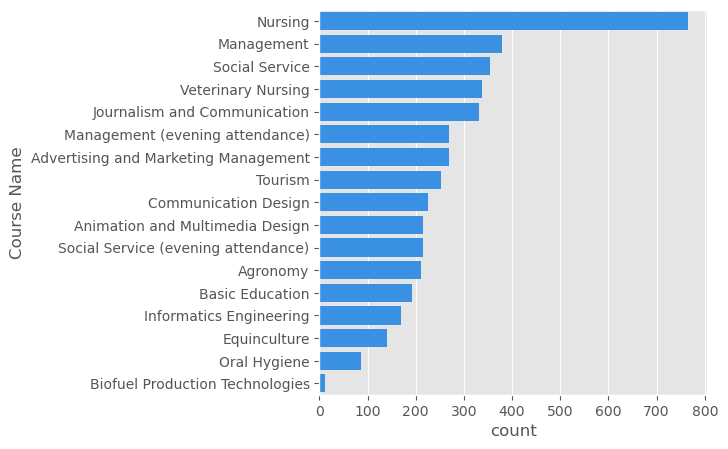

In [250]:
# Distribuição dos cursos
fig, ax = plt.subplots(figsize = (5,5))
df = df.sort_values(by = "Course Name")
bars = sns.countplot(df, y = "Course Name", 
                     orient = 'v', 
                     color= 'dodgerblue', 
                     order = list(df.groupby(by = "Course Name")["Course"].count().sort_values(ascending=False).index))


plt.show()

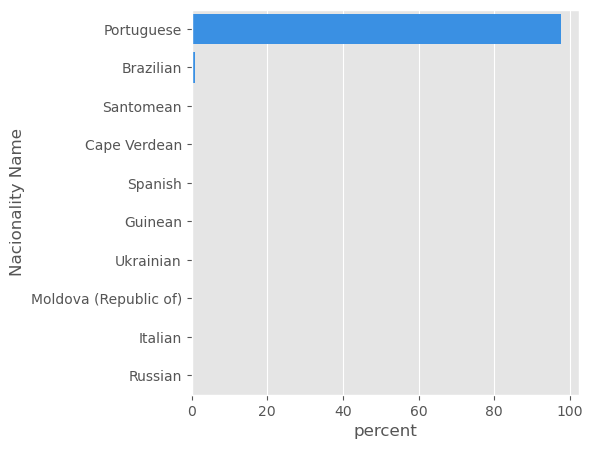

In [251]:
# Distribuição das nacionalidades
fig, ax = plt.subplots(figsize = (5,5))
df = df.sort_values(by = "Nacionality Name")
bars = sns.countplot(df, y = "Nacionality Name", 
                     orient = 'v', 
                     color= 'dodgerblue', 
                     stat = "percent",
                     order = list(df.groupby(by = "Nacionality Name")["Nacionality"].count().sort_values(ascending=False).nlargest(10).index))


plt.show()

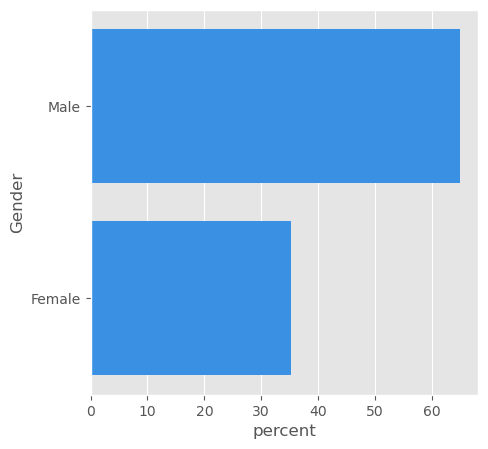

In [252]:
# Distribuição por gênero
fig, ax = plt.subplots(figsize = (5,5))
bars = sns.countplot(df, y = "Gender",stat = "percent", orient= 'v', color= 'dodgerblue')
ax.set_yticks(ticks= [0,1], labels=["Male","Female"])

plt.show()

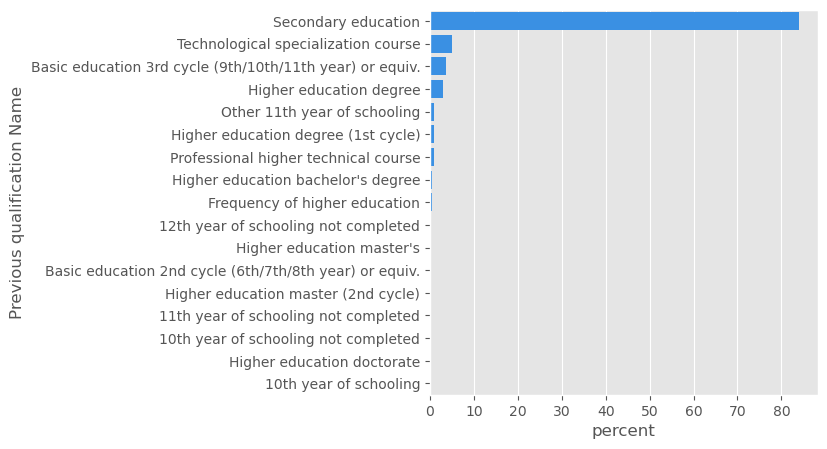

In [253]:
# Distribuição das qualificações
fig, ax = plt.subplots(figsize = (5,5))
df = df.sort_values(by = "Previous qualification Name")
bars = sns.countplot(df, y = "Previous qualification Name", 
                     orient = 'v', 
                     color= 'dodgerblue', 
                     stat = "percent",
                     order = list(df.groupby(by = "Previous qualification Name")["Previous qualification"].count().sort_values(ascending=False).index))


plt.show()

C:\Users\Cadu\AppData\Local\Temp\ipykernel_16612\1151101836.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.countplot(df,


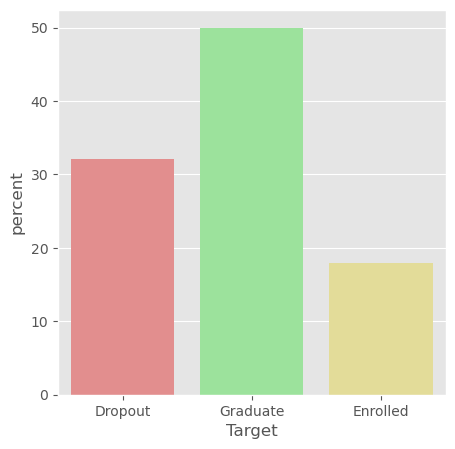

In [254]:
# Distribuição da variável target

custom_pallete = {'Dropout':'lightcoral',
                 'Enrolled': 'khaki',
                 'Graduate':'lightgreen'}

fig, ax = plt.subplots(figsize = (5,5))
bars = sns.countplot(df, 
                     x = "Target", 
                     stat = "percent",
                    palette= custom_pallete)
                    

plt.show()

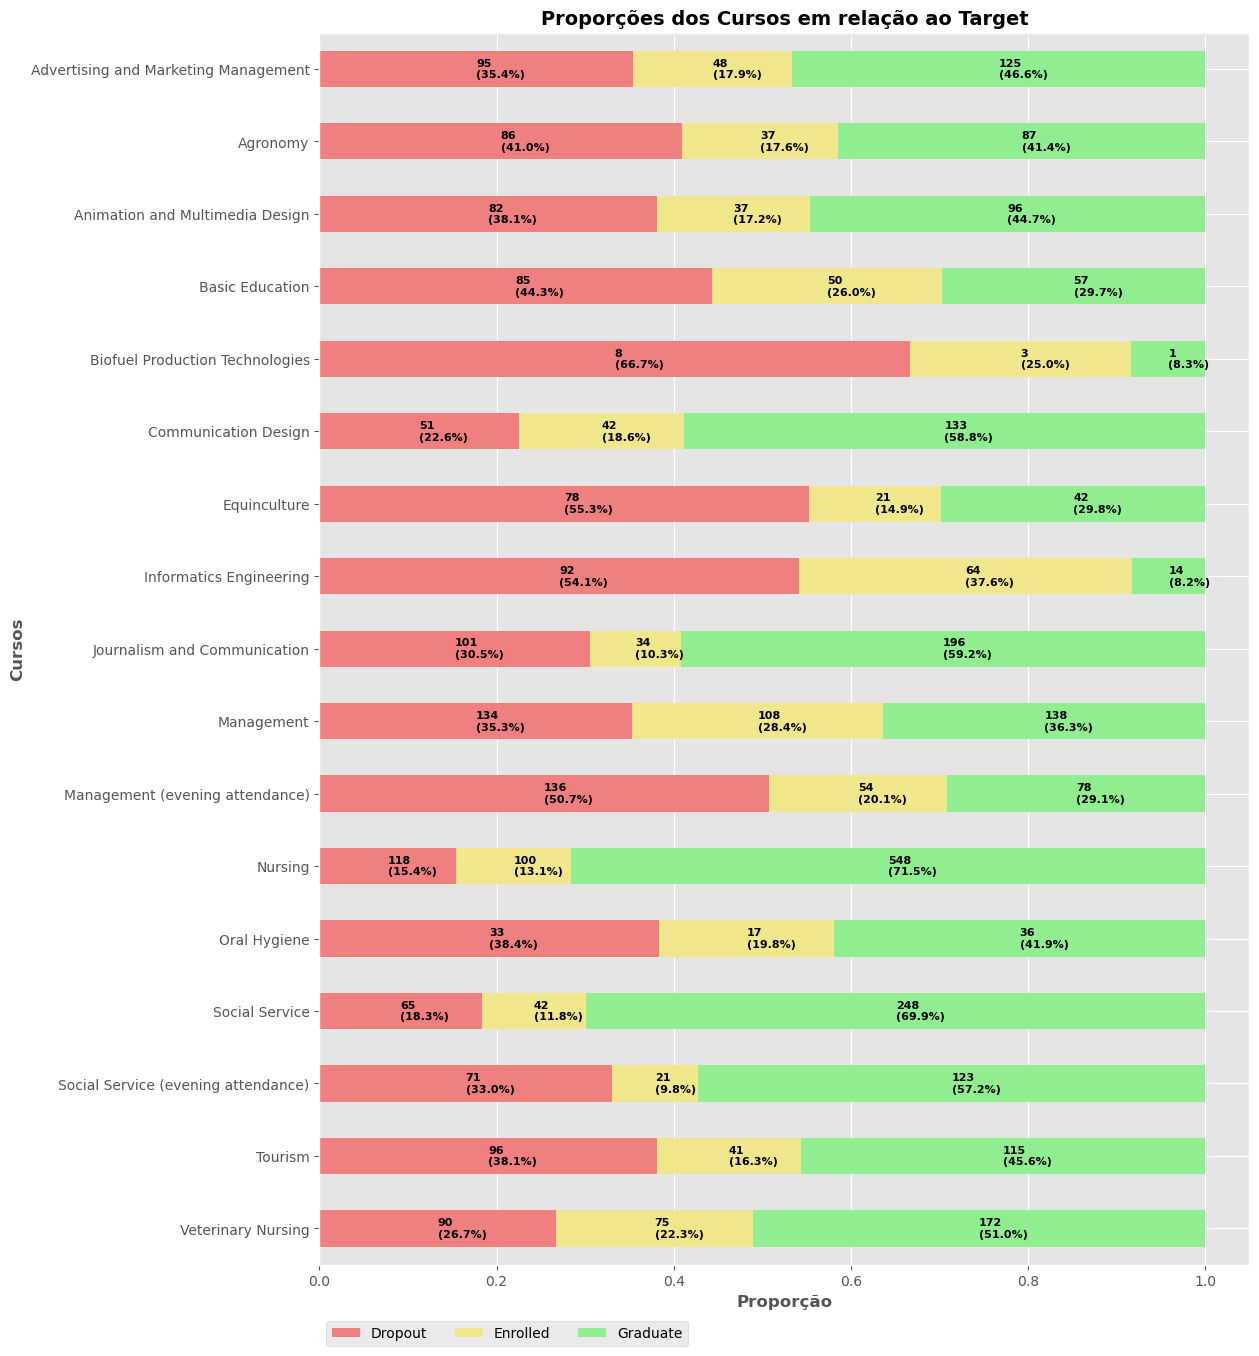

In [255]:
# Distribuição dos cursos por variável target (Dropout, Enrolled and Graduate)

data_bar = df[["Course Name","Target"]]
cross_tab_prop = pd.crosstab(index=data_bar['Course Name'],
                             columns=data_bar['Target'],
                             normalize="index").sort_index(ascending=False)

cross_tab = pd.crosstab(index=data_bar['Course Name'],
                        columns=data_bar['Target']).sort_index(ascending=False)

cross_tab_prop.plot(kind='barh',
                    stacked=True, 
                    color =['lightcoral','khaki','lightgreen'],
                    figsize=(12, 16)
)

plt.legend(loc="upper left", ncol=3, bbox_to_anchor = (0.00,-0.04))
plt.ylabel("Cursos", fontsize = 12, fontweight = 'bold')
plt.xlabel("Proporção", fontsize = 12, fontweight = 'bold')
plt.title("Proporções dos Cursos em relação ao Target", fontsize = 14, fontweight = 'bold' )


for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, count, y_loc) in zip(cross_tab_prop.loc[x],
                                          cross_tab.loc[x],
                                          cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=(y_loc - proportion) + (proportion / 2),
                 y=n - 0.12,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=8,
                 fontweight = 'bold')


plt.show()

#### Correlação dos dados

C:\Users\Cadu\anaconda3\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
C:\Users\Cadu\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


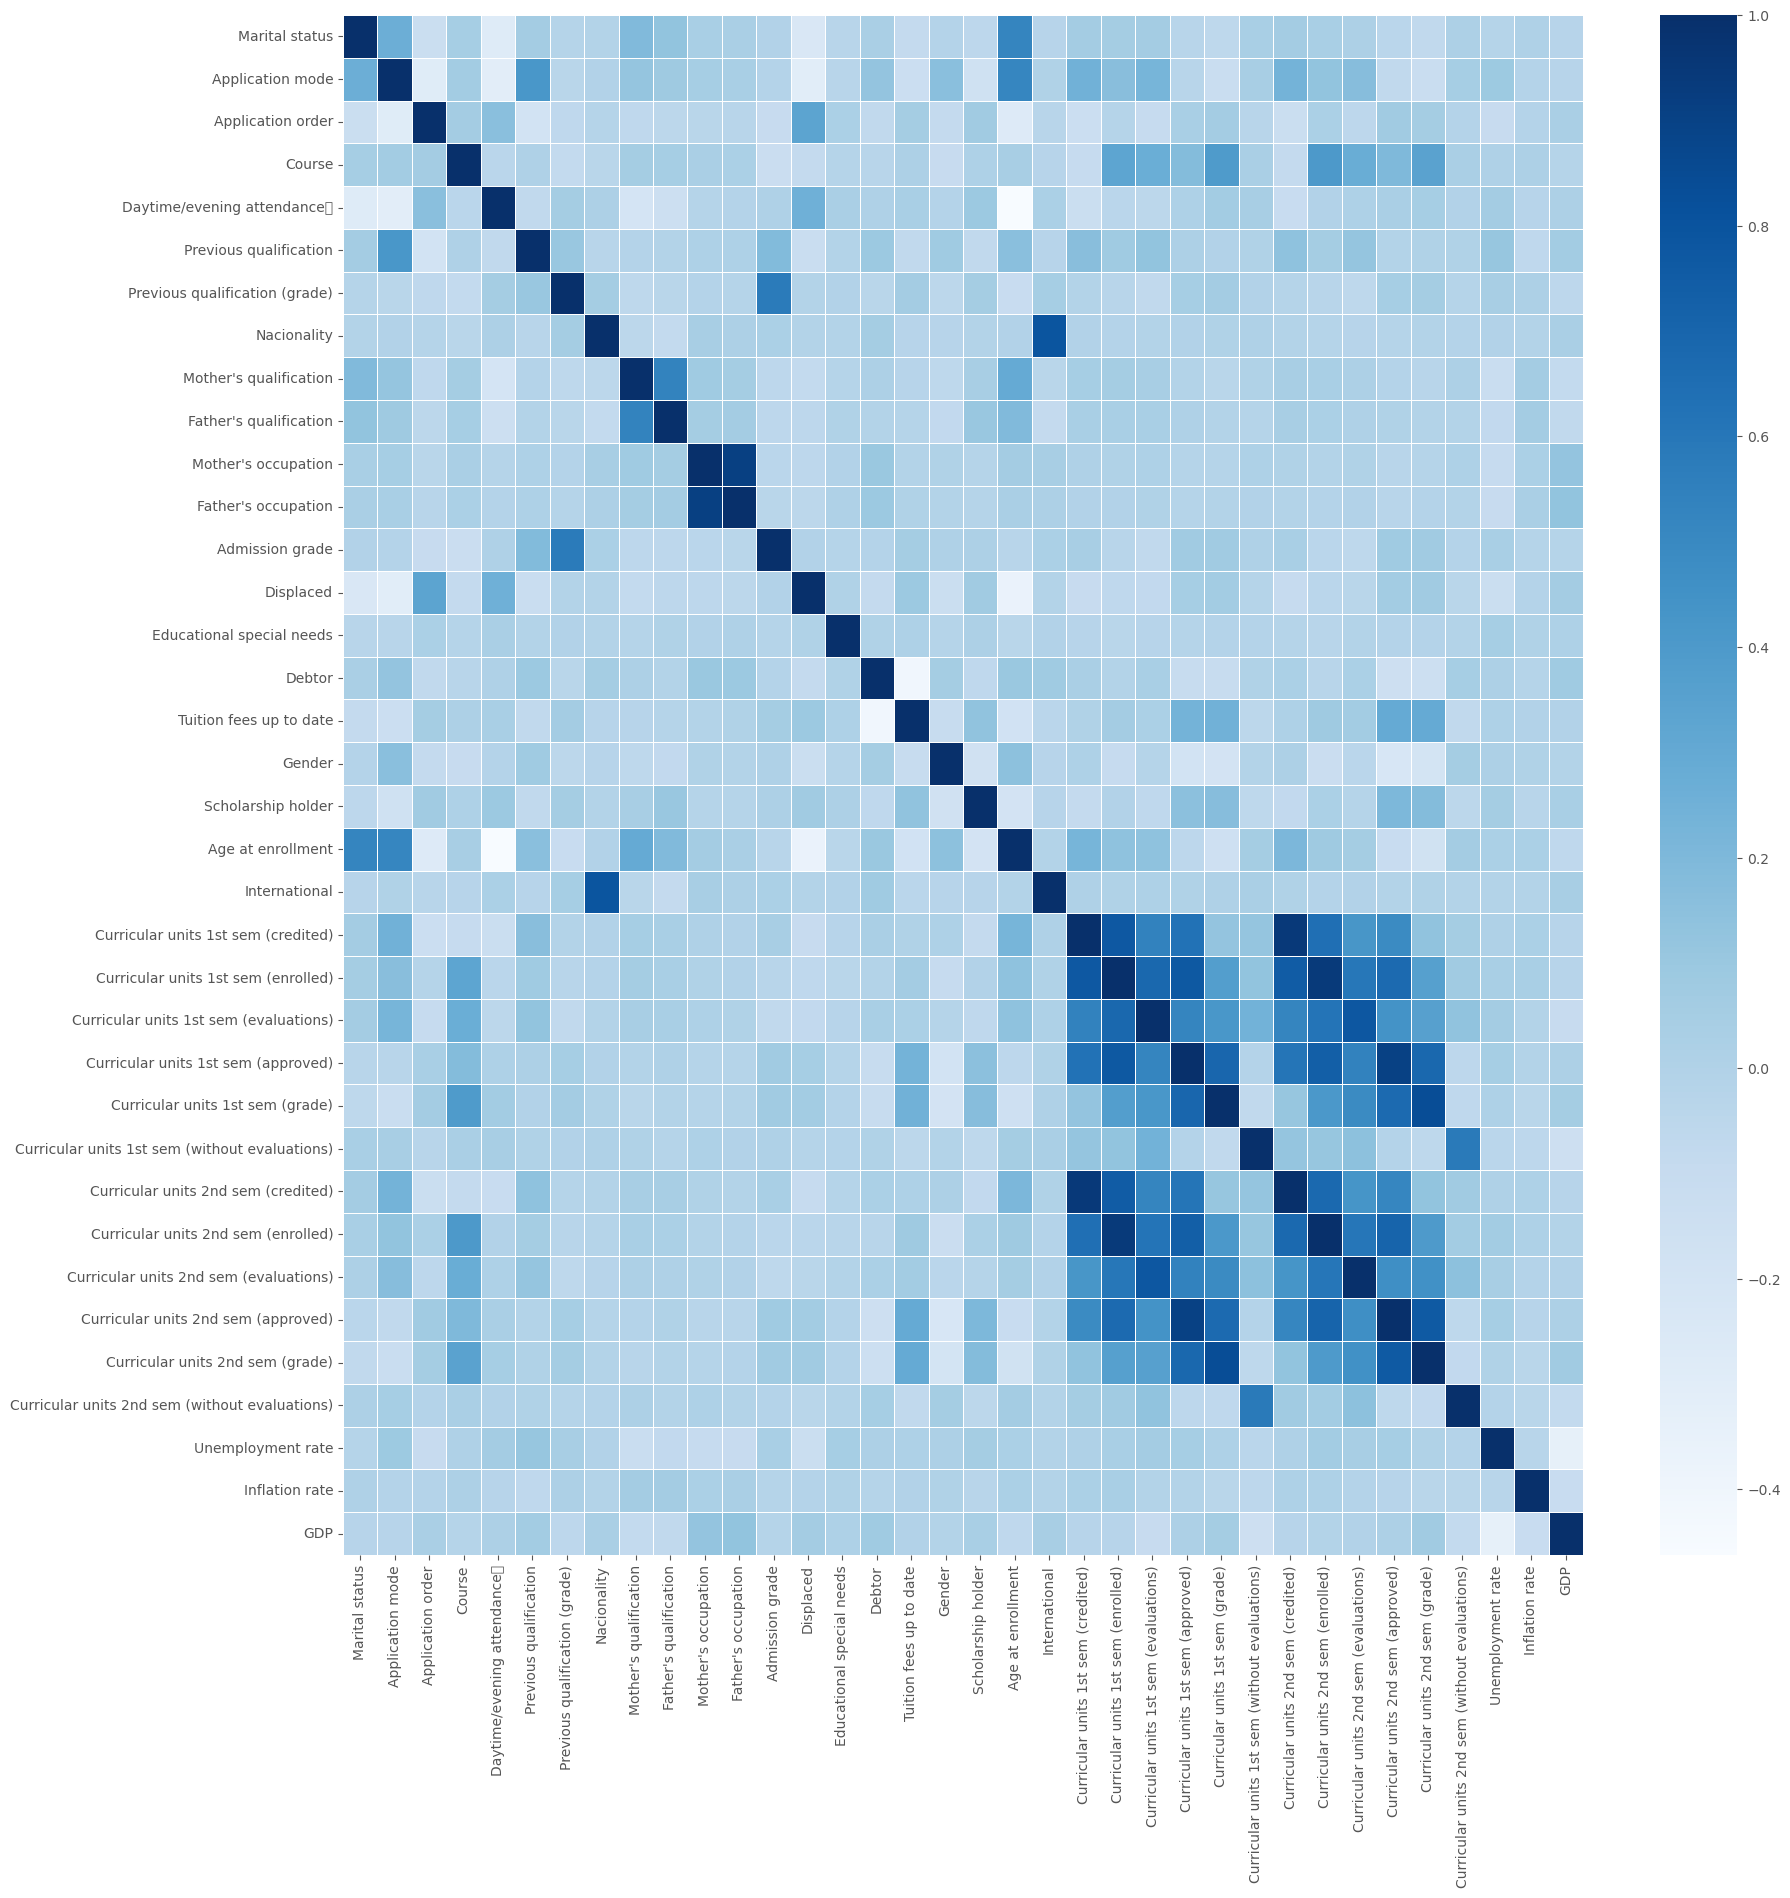

In [256]:
fig, ax = plt.subplots(figsize = (20,20))
sns.heatmap(data = df.corr(), annot=False, linewidths=.5, cmap = "Blues")

plt.show()

In [257]:
custom_pallete = {'Dropout':'lightcoral',
                 'Enrolled': 'khaki',
                 'Graduate':'lightgreen'}

C:\Users\Cadu\AppData\Local\Temp\ipykernel_16612\1295048379.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data = df, x = "Target", y ="Curricular units 1st sem (approved)", palette = custom_pallete)


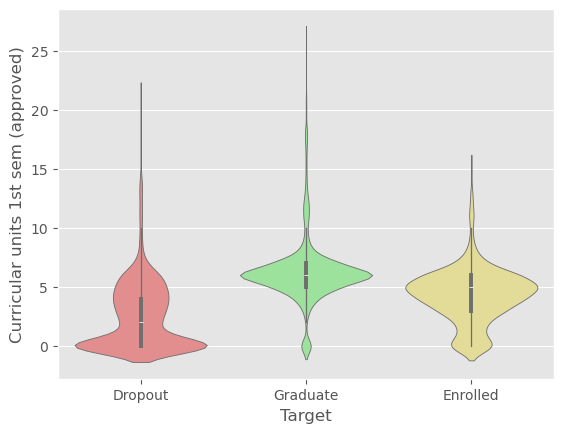

In [258]:
sns.violinplot(data = df, x = "Target", y ="Curricular units 1st sem (approved)", palette = custom_pallete)

plt.show()

C:\Users\Cadu\AppData\Local\Temp\ipykernel_16612\3998945378.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data = df, x = "Target", y ="Curricular units 2nd sem (approved)", palette = custom_pallete)


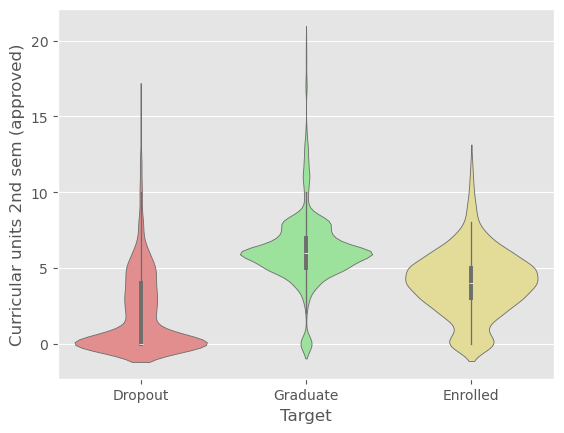

In [259]:
sns.violinplot(data = df, x = "Target", y ="Curricular units 2nd sem (approved)", palette = custom_pallete)

plt.show()

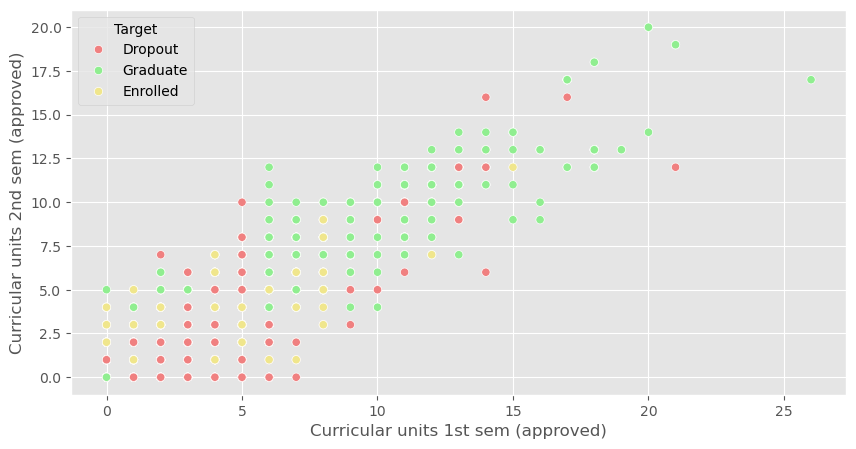

In [260]:
fig, ax = plt.subplots(figsize = (10,5))
sns.scatterplot(data = df, x = "Curricular units 1st sem (approved)", y = "Curricular units 2nd sem (approved)", hue = "Target", palette = custom_pallete)

plt.show()

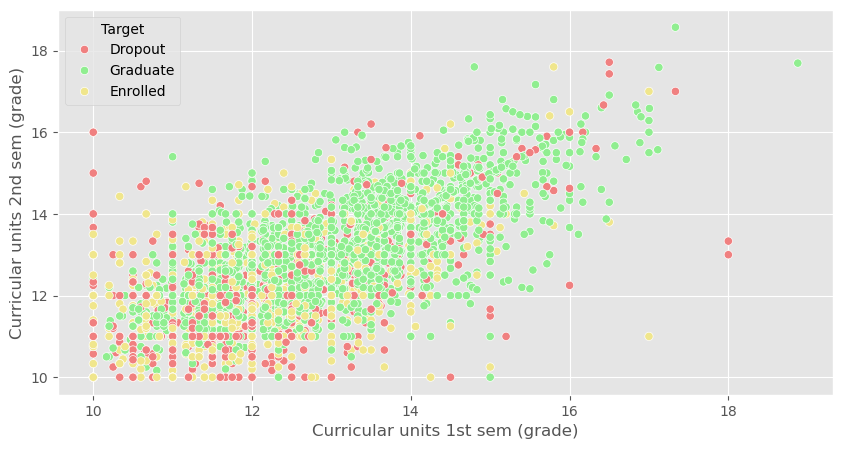

In [261]:
fig, ax = plt.subplots(figsize = (10,5))
sns.scatterplot(data = df.loc[(df["Curricular units 1st sem (grade)"] != 0) & (df["Curricular units 2nd sem (grade)"] != 0)],
                              x = "Curricular units 1st sem (grade)", y = "Curricular units 2nd sem (grade)", hue = "Target", palette = custom_pallete)

plt.show()

## Reduzindo Dimensionalidade dos dados

In [262]:
#Separando a base de dados em treino e teste

from sklearn.model_selection import train_test_split
X = df.drop(["Course Name","Previous qualification Name", "Nacionality Name","Target"], axis = 1 )
y = df.Target.map({'Dropout': 1,
                  'Enrolled': 2,
                  'Graduate': 3})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

C:\Users\Cadu\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


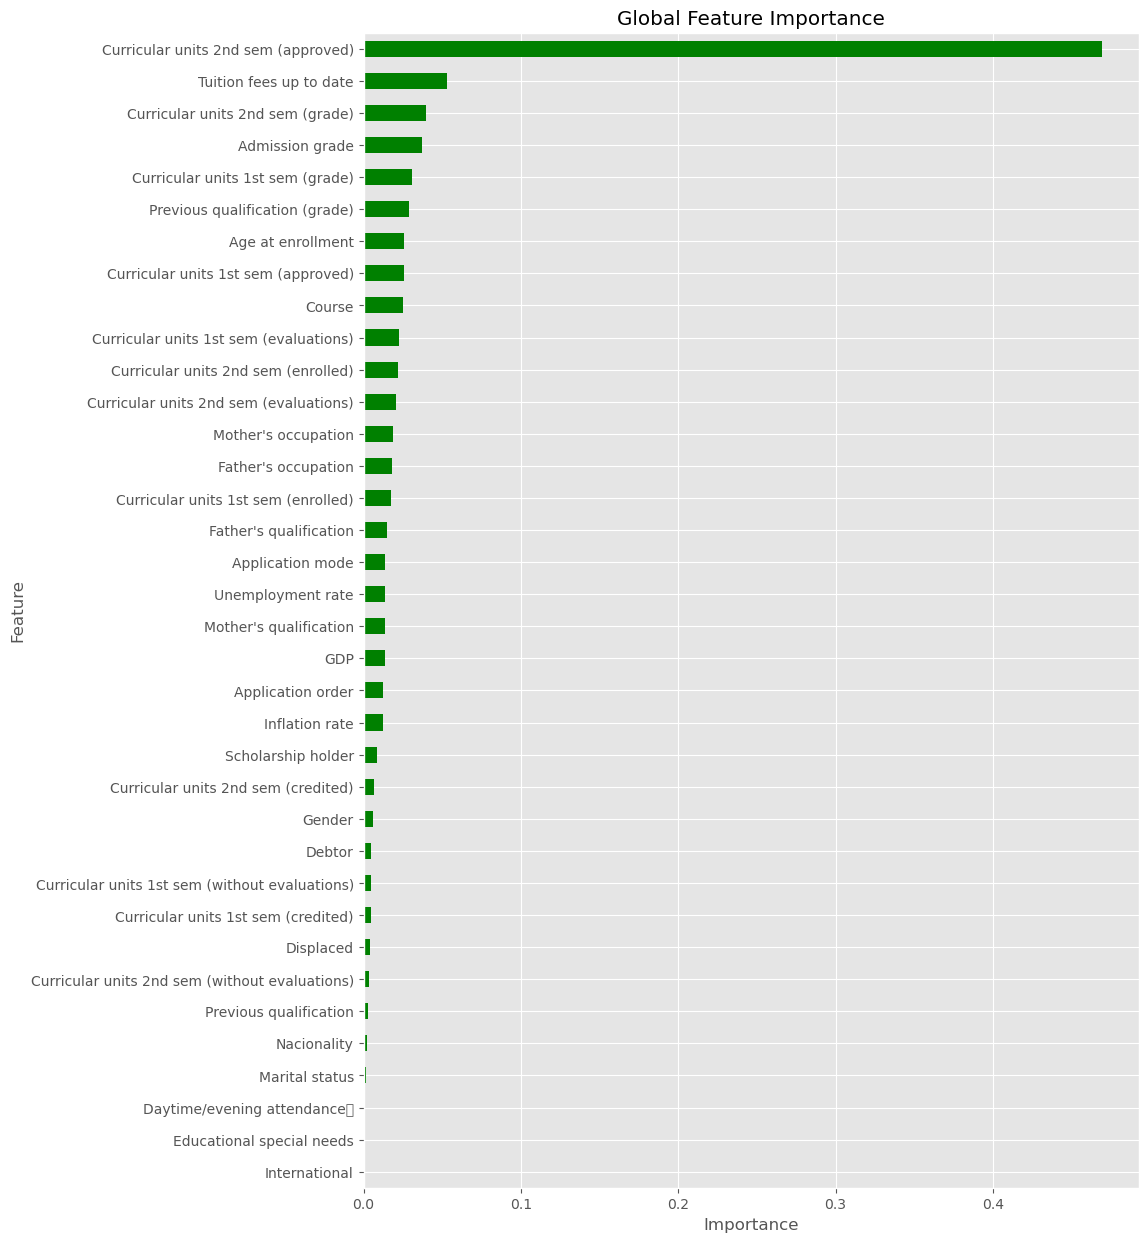

In [263]:
#Criando o modelo de Random Forest

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=500)
rf.fit(X_train, y_train)

global_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
global_importances.sort_values(ascending=True, inplace=True)
fig, ax = plt.subplots(figsize = (10,15))
ax = global_importances.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance")
plt.show()

In [264]:
df1 = df1.loc[:,['Curricular units 2nd sem (approved)','Tuition fees up to date','Curricular units 2nd sem (grade)','Admission grade','Previous qualification','Target']]
df2 = df2.loc[:,['Curricular units 2nd sem (approved)','Tuition fees up to date','Curricular units 2nd sem (grade)','Admission grade','Previous qualification','Target']]
df3 = df3.loc[:,['Curricular units 2nd sem (approved)','Tuition fees up to date','Curricular units 2nd sem (grade)','Admission grade','Previous qualification','Target']]

## Aplicando modelos de Machine Learning

### Logistic Regression

In [265]:
X = df1.iloc[:,:-1].values
y = df1.iloc[:,-1].map({'Dropout': 1, 'Enrolled': 2,'Graduate': 3}).values

In [266]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [267]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [268]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [269]:
y_pred = classifier.predict(X_test)

In [270]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[225  32  74]
 [ 40  23 137]
 [ 31   1 543]]


0.7151898734177216

### Decision Tree

In [271]:
X = df2.iloc[:,:-1].values
y = df2.iloc[:,-1].map({'Dropout': 1, 'Enrolled': 2,'Graduate': 3}).values

In [272]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [273]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [274]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [275]:
y_pred = classifier.predict(X_test)

In [276]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[253  57  62]
 [ 64  60  84]
 [ 62  68 396]]


0.6410488245931284

### Random Forest

In [277]:
X = df3.iloc[:,:-1].values
y = df3.iloc[:,-1].map({'Dropout': 1, 'Enrolled': 2,'Graduate': 3}).values

In [278]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [279]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [280]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [281]:
y_pred = classifier.predict(X_test)

In [282]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[267  45  69]
 [ 60  55  69]
 [ 47  50 444]]


0.6925858951175407